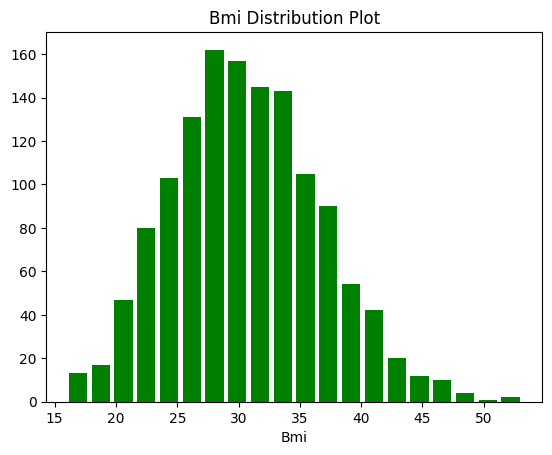

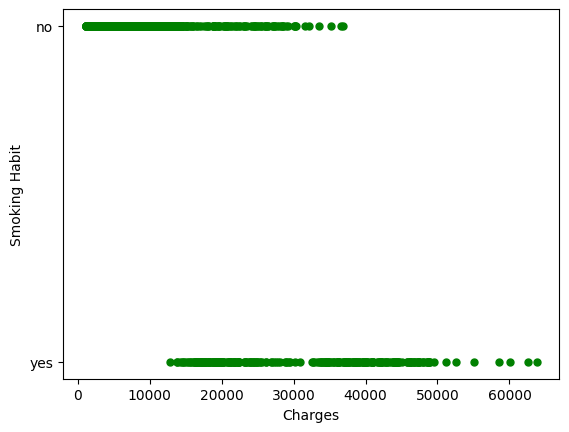

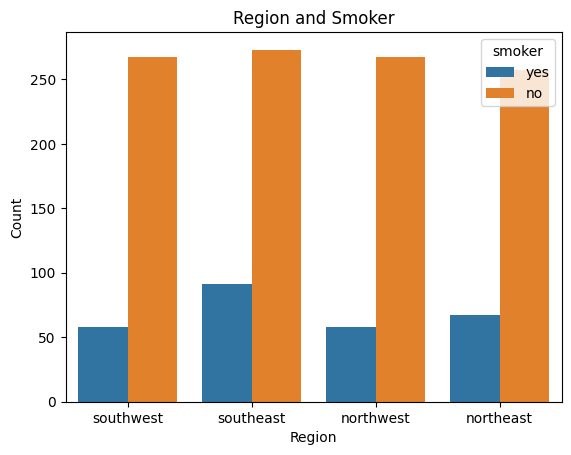

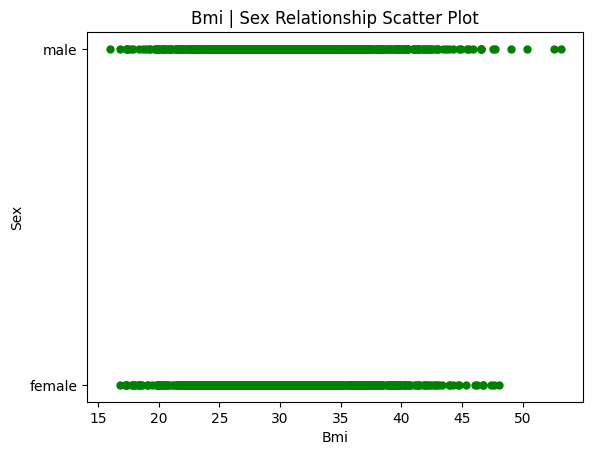

Region With The Maximum Amount Of Children Is = Southwest, And The Amount Is = 5


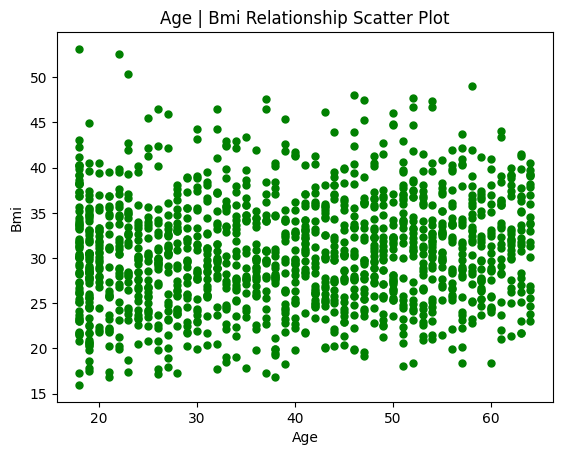

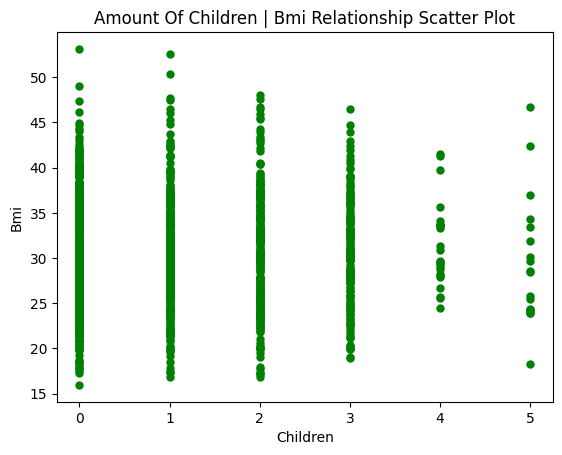

172     15.960
428     16.815
1226    16.815
412     17.195
1286    17.290
         ...  
286     48.070
116     49.060
847     50.380
1047    52.580
1317    53.130
Name: bmi, Length: 1338, dtype: float64


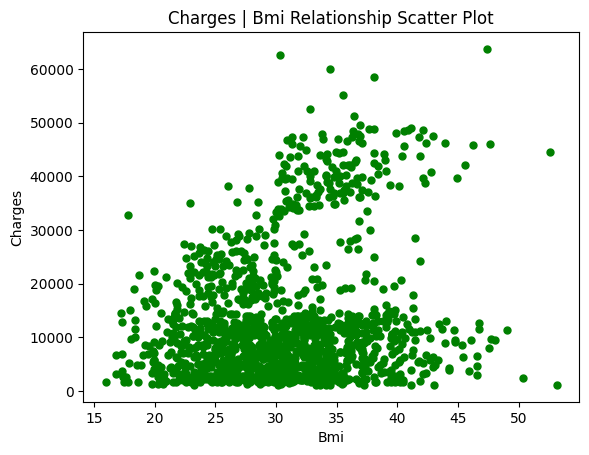

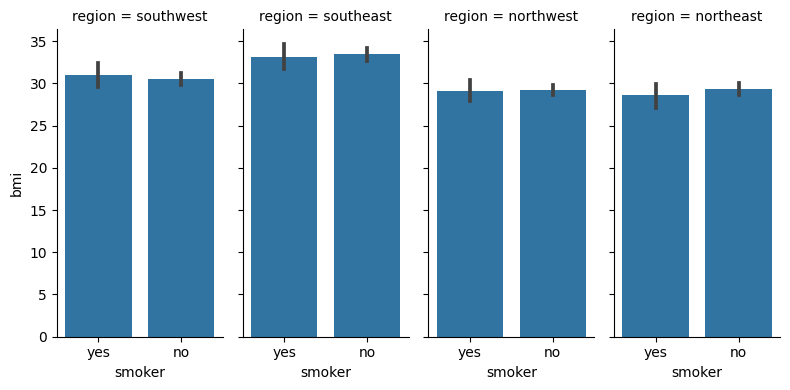

Lineer Model Results:
Mean Absolute Error = 129.9690504532969
Mean Absolute Percentage Error = 2144610987170240.0
Mean Squarred Error = 33721.24981590658
Explained Variance Score = 0.783528159908728

Ridge Model Results:
Mean Absolute Error = 130.08621682720482
Mean Absolute Percentage Error = 2161283376461758.5
Mean Squarred Error = 33708.995966873816
Explained Variance Score = 0.7835930878741896

Lasso Model Results:
Mean Absolute Error = 130.12048001201083
Mean Absolute Percentage Error = 2231396808582749.2
Mean Squarred Error = 33692.58983123064
Explained Variance Score = 0.7837077973119011

RandomTree Model Results:
Mean Absolute Error = 128.05597014925374
Mean Absolute Percentage Error = 16804476221532.07
Mean Squarred Error = 64792.97388059701
Explained Variance Score = 0.5823938999744154

DecisionTree Model Results:
Mean Absolute Error = 164.7089552238806
Mean Absolute Percentage Error = 16804476221532.229
Mean Squarred Error = 82933.5895522388
Explained Variance Score = 0.4684

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


{'max_depth': 10, 'max_features': 1}
After The Adjustments Variance Score Improved From 0.5823938999744154 To 0.6217775296083554


In [14]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV


# reading the dataset from the file
df = pd.read_csv("insurance.csv")

# displaying the distribution of "bmi"
plt.hist(df['bmi'], 20, color = 'green',histtype = 'bar', rwidth = 0.8)
plt.xlabel("Bmi")
plt.title("Bmi Distribution Plot")
plt.show()

# displaying the relationship between “smoker” and “charges”
plt.scatter(df['charges'], df['smoker'], label= "dot", color= "green", marker= ".", s=100)
plt.xlabel("Charges")
plt.ylabel("Smoking Habit")
plt.show()

# displaying the relationship between "smoker" and "region"
sns.countplot(data=df,x='region',hue='smoker')
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Region and Smoker")
plt.show()

# displaying the relationship between “bmi" and "sex"
plt.scatter(df['bmi'], df['sex'], label= "dot", color= "green", marker= ".", s=100)
plt.ylabel("Sex")
plt.xlabel("Bmi")
plt.title("Bmi | Sex Relationship Scatter Plot")
plt.show()

# finding the region with the most amount of children
maxchildren=df[df['children']==max(df['children'])]# we can see that the amount is 5
regionwiththemaxchildren=maxchildren[maxchildren['region']==max(maxchildren['region'])]# and the region is southwest
print("Region With The Maximum Amount Of Children Is = Southwest, And The Amount Is = 5")

# displaying the relationship between “bmi" and "age"
plt.scatter(df['age'], df['bmi'], label= "dot", color= "green", marker= ".", s=100)
plt.xlabel("Age")
plt.ylabel("Bmi")
plt.title("Age | Bmi Relationship Scatter Plot")
plt.show()

# displaying the relationship between “bmi" and "children"
plt.scatter(df['children'], df['bmi'], label= "dot", color= "green", marker= ".", s=100)
plt.xlabel("Children")
plt.ylabel("Bmi")
plt.title("Amount Of Children | Bmi Relationship Scatter Plot")
plt.show()

# is there an outlier in "bmi" variable
sortedbmi=df['bmi'].sort_values()
print(sortedbmi)# bmi values of '53' and '52' are outliers we can also look at the bmi distrubiton plot.

# displaying the relationship between “bmi" and "charges"
plt.scatter(df['bmi'], df['charges'], label= "dot", color= "green", marker= ".", s=100)
plt.xlabel("Bmi")
plt.ylabel("Charges")
plt.title("Charges | Bmi Relationship Scatter Plot")
plt.show()

# relationship between “region”, “smoker” and “bmi
g = sns.FacetGrid(df, col="region", height=4, aspect=.5)
g.map(sns.barplot, "smoker", "bmi", order=["yes", "no"])
plt.show()

# initialization of label encoder
labelencoder=LabelEncoder()

# changing data type to numbers
df['charges'] = labelencoder.fit_transform(df['charges'])
df['region'] = labelencoder.fit_transform(df['region'])
df['sex'] = labelencoder.fit_transform(df['sex'])
df['smoker'] = labelencoder.fit_transform(df['smoker'])
df['bmi'] = labelencoder.fit_transform(df['bmi'])


# defining axises for our model
y = df['charges']
X = df.drop(['charges'], axis=1)

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# scaling it
StandardScaler().fit_transform(X_train,y_train)
StandardScaler().fit_transform(X_test,y_test)

# defining our model
model1 = LinearRegression()
model2 = Ridge()
model3 = Lasso()
model4=RandomForestClassifier()
model5=DecisionTreeClassifier()



# training our model
model1.fit(X_train, y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)
model5.fit(X_train,y_train)


# defining predictions
lineerpred = model1.predict(X_test)
ridgepred = model2.predict(X_test)
lassopred= model3.predict(X_test)
randompred=model4.predict(X_test)
decisionpred=model5.predict(X_test)


# comparing the models
print("Lineer Model Results:")
print(f"Mean Absolute Error = {mean_absolute_error(y_test,lineerpred)}")
print(f"Mean Absolute Percentage Error = {mean_absolute_percentage_error(y_test,lineerpred)}")
print(f"Mean Squarred Error = {mean_squared_error(y_test,lineerpred)}")
print(f"Explained Variance Score = {explained_variance_score(y_test,lineerpred)}\n")

print("Ridge Model Results:")
print(f"Mean Absolute Error = {mean_absolute_error(y_test,ridgepred)}")
print(f"Mean Absolute Percentage Error = {mean_absolute_percentage_error(y_test,ridgepred)}")
print(f"Mean Squarred Error = {mean_squared_error(y_test,ridgepred)}")
print(f"Explained Variance Score = {explained_variance_score(y_test,ridgepred)}\n")

print("Lasso Model Results:")
print(f"Mean Absolute Error = {mean_absolute_error(y_test,lassopred)}")
print(f"Mean Absolute Percentage Error = {mean_absolute_percentage_error(y_test,lassopred)}")
print(f"Mean Squarred Error = {mean_squared_error(y_test,lassopred)}")
print(f"Explained Variance Score = {explained_variance_score(y_test,lassopred)}\n")

print("RandomTree Model Results:")
print(f"Mean Absolute Error = {mean_absolute_error(y_test,randompred)}")
print(f"Mean Absolute Percentage Error = {mean_absolute_percentage_error(y_test,randompred)}")
print(f"Mean Squarred Error = {mean_squared_error(y_test,randompred)}")
print(f"Explained Variance Score = {explained_variance_score(y_test,randompred)}\n")

print("DecisionTree Model Results:")
print(f"Mean Absolute Error = {mean_absolute_error(y_test,decisionpred)}")
print(f"Mean Absolute Percentage Error = {mean_absolute_percentage_error(y_test,decisionpred)}")
print(f"Mean Squarred Error = {mean_squared_error(y_test,decisionpred)}")
print(f"Explained Variance Score = {explained_variance_score(y_test,decisionpred)}\n")

# for me it was lineer regression that performed the best but it doesn't have any hyperparameters to change so we are going to use randomforest instead
# using grid search with randomforest model
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(1,8))}]

clf = GridSearchCV(model4, forest_params, cv = 2, scoring='accuracy')
clf.fit(X_train, y_train)
print(clf.best_params_)

newmodel=RandomForestClassifier(max_depth=10,max_features=1)
newmodel.fit(X_train,y_train)
npred=newmodel.predict(X_test)
print(f"After The Adjustments Variance Score Improved From {explained_variance_score(y_test,randompred)} To {explained_variance_score(y_test,npred)}")

# this is the last line of the project i did this project on my own just with watching the lessons that globalai has given me





